## 4.1. Intepolação polinomial

A interpolação polinomial é um método de aproximação de funções por polinômios. A interpolação é utilizada quando se conhece apenas alguns pontos da função ou quando a função é muito complicada e difícil de manejar. Os polinômios têm a vantagem de serem fáceis de derivar e integrar. Além disso, é possível provar que qualquer função contínua pode ser arbitrariamente aproximada por um polinômio (teorema de Weierstrass). 

Outra particularidade é que o valor numérico de um polinômio 

$$P_n(x)= a_0 + a_1x + a_2x^2+...+a_nx^n$$ 

para algum valor real de $x$ pode ser calculado com um número reduzido de operações aritméticas escrevendo-o na forma

$$P_n(x)=a_0+x(a_1+x(a_2+x(...+x(a_{n-1}+xa_n)...)))$$

o que apresenta algumas vantagens computacionalmente, como veremos mais para frente ao realizar a interpolação pela fórmula de Newton.

Interpolar uma função $f(x) = y$ em um conjunto de $n+1$ pontos distintos ${x_0,x_1,...,x_n}$ de um intervalo $[a,b]$ por um polinômio de significa encontrar $P_n(x)= a_0 + a_1x+...+ax^n$ tal que $P(x_i)=y_i$ com  $i = 0,1,...,n$. Ou seja, significa encontrar o polinômio de grau $n$ que "passa" por  esses pontos. 

Na figura abaixo é mostrada um polinômio que interpola uma função a partir de 6 pontos. É possível observar que o polinômio passa pelos pontos, ou seja, $P(x_i) = y_i$, $i=0,1,...,5$, e que aproxima a função razoavelmente bem a função no intervalo de $x_1$ até $x_5$. No intervalo entre $x_0$ e $x_1$ a aproximação não é tão boa e fora do intervalo $(x_0,x_5)$ parece não funcionar muito bem.   

<img src="imagens/figura_3.1.png" width="800">



O caso mais simples de interpolação que podemos analisar é o de encontrar a reta (polinômio de grau 1) que passa por dois pontos, $(x_0, y_0)$ e $(x_1,y_1)$. Nesse caso, o polinômio tem a forma $P(x)=a_0+a_1x$ e para determiná-lo basta encontrar os coeficientes $a_0$ e $a_1$ da única reta que passa por esses dois pontos. Logo, os coeficientes podem ser obtidos resolvendo o sistema linear:

$\begin{cases} 
       y_0 = a_0 + a_1 x_0\\ 
       y_1 = a_0 + a_1 x_1\\
\end{cases}$
ou, na forma matricial
$\left[\begin{array}{cc} 
          1 & x_0 \\ 
	      1 & x_1 \\ 
\end{array} \right]
\left[\begin{array}{c} 
          a_0 \\ 
	      a_1 \\ 
\end{array} \right]
=
\left[\begin{array}{c} 
          y_0 \\ 
	      y_1 \\ 
\end{array} \right]$


A solução pode ser obtida fazendo $a_1 = \frac{y_1 - y_0}{x_1 - x_0}$ e $a_0 = y_0 - a_1x_0$.




#### Exemplo 4.1
Vamos obter o polinômio que interpola os pontos ${(1,2),(5,1)}$.<br>
_Solução:_
Para isso, resolvemos o sistema linear
$$ \begin{cases} 
	         a_0 + a_1 = 2\\ 
	         a_0 + 5a_1 = 1\\
	         \end{cases} $$
que nos fornece:

$a_1=\frac{y_1 - y_0}{x_1 - x_0}=\frac{1 - 2}{5 - 1}=-\frac{1}{4}$
e
$a_0 = y_0 - a_1x_0 = 2 +\frac{1}{4} = \frac{9}{4}$ 

Assim, obtemos

$$P(x)= \frac{9}{4}-\frac{1}{4}x$$

A figura abaixo mostra o resultado


<img src="imagens/figura_3.2.png" width="600">

Assim, generalizando o caso anterior, para obter os coeficientes do polinômio $P(x)=a_0 + a_1x + a_2x^2+...+a_nx^n$, de grau $n$, que interpola uma função a partir de $n+1$ pontos $(x_i,y_i)$, $i=0,1,...,n$, podemos resolver o seguinte sistema 

$\left[\begin{array}{ccccc} 
          1 & x_0 & x_0^2 & ... & x_0^n\\ 
	      1 & x_1 & x_1^2 & ... & x_1^n\\ 
          ...& ... & ... & ... & ...\\ 
          1 & x_n & x_n^2 & ... & x_n^n\\ 
\end{array} \right]
\left[\begin{array}{c} 
          a_0 \\ 
	      a_1 \\ 
          ...\\
          a_n \\ 
\end{array} \right]
=
\left[\begin{array}{c} 
          y_0 \\ 
	      y_1 \\ 
          ...\\
          y_n \\
\end{array} \right]$


A matriz $n \times n$ mostrada acima é chamada matriz de Vandermonde e tem determinante não nulo para pontos $x_i$ distintos, ou seja, polinômio de coeficientes $a_0,a_1,...,a_n$ existe e é único. Usando o módulo `polynomial` de Numpy a matriz de Vandermonde pode ser obtida usando a função `np.polynomial.polynomial.polyvander`.

#### Exemplo 4.2
Considere o problema de encontrar um polinômio interpolador para do conjunto de pontos $\{(0, 1)$, $(1, 6)$, $(2, 5)$, $(3, -8)\}$. Como o conjunto consiste de 4 pontos, o polinômio interpolador deve ser da forma: $p(x) = a_0 + a_1x + a_2x^2 + a_3x^3$

O que nos leva ao sistema linear:

$$\begin{cases} 
    a_0=1\\
    a_0+a_1+a_2+a_3=6\\
    a_0+2a_1+4a_2+ 8a_3=5\\
    a_0+3a_1+9a_2+27a_3=-8
\end{cases} $$

cuja solução é $a_0=1$, $a_1=6$, $a_2=0$ e $a_3=-1$. Portanto, o polinômio interpolador é $p(x)=1+6x-x^3$.

Podemos verificar o resultado plotando os pontos e o polinômio:

In [93]:
import matplotlib.pyplot as plt
import numpy as np

xi = np.array([0.,1.,2.,3.])

A = np.array([xi**0,
              xi**1,
              xi**2,
              xi**3]).T

yi = np.array([1.,6.,5.,-8.])

x = np.linalg.solve(A, yi)

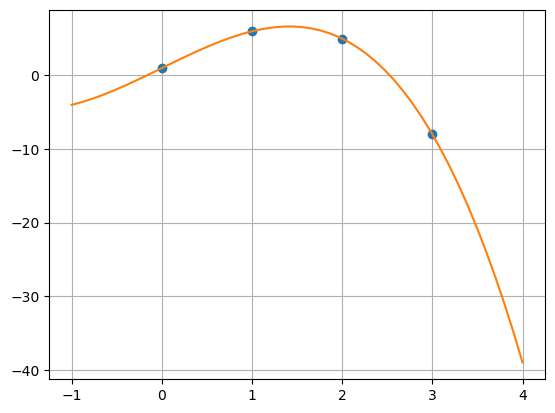

In [94]:
xi = np.array([0.,1.,2.,3.])
yi = np.array([1.,6.,5.,-8.])

x = np.linspace(-1,4)
y = 1+6*x-x**3

plt.plot(xi,yi,'o',x,y)
plt.grid()
plt.savefig('imagens/Exemplo3.2.png',dpi=300)

Computacionalmente, podemos resolver esse exemplo como é mostrado a seguir, utilizando as operações vetorizadas da biblioteca `numpy` para montar a matriz do sistema e a função `solve` do módulo `linalg` para resolver, assim obtemos facilmente os coeficientes do polinômio interpolador. Também podemos usar a conveniente função `polyval` para avaliar o valores do polinômio em um conjunto de valores de $x$. Faremos isso para verificar se correspondem aos valores da função, como é esperado, ou seja, se $P(x_i)=y_i$, $i=0,1,2,3$. 





In [35]:
A = np.array([xi**0,xi**1,xi**2,xi**3]).T
#ou  A = np.polynomial.polynomial.polyvander(xi,3)
ai = np.linalg.solve(A,yi)
coeffs = np.flipud(ai) # reverte a ordem

print ("Coeficientes:", coeffs)
print ("P(xi):", np.polyval(coeffs,xi))

Coeficientes: [-1. -0.  6.  1.]
P(xi): [ 1.  6.  5. -8.]


Como é possível notar, com poucas linhas de código, utilizando as convenientes funções disponíveis na biblioteca NumPy, é possível obter o polinômio que interpola os pontos dados. Podemos também verificar que os numéricos do polinômio em cada um dos pontos coincidem com os valores da função, ou seja, $f(x_i)$, $i=0,1,2,3$.

Embora sempre seja possível obter o polinômio interpolador de grau  que passa por um conjunto de  pontos distintos resolvendo um sistema linear, essa pode não ser a maneira mais eficiente de fazer isso. A seguir serão apresentadas duas fórmulas bem conhecidas para interpolação polinomial que requerem menos esforço computacional, as fórmula de Lagrange e de Newton. A primeira requer um número maior de operações aritméticas básicas mas ainda assim pode ser mais vantajosa quando várias funções precisam ser interpoladas no mesmo conjunto de pontos. 
    

### 3.2. Fórmula Interpolatória de Lagrange

Seja $f(x)$ definida em $x_0, x_1,...,x_n$, $(n+1)$ pontos distintos de um intervalo $[a,b]$ e $y_i=f(x_i)$, $i=0,1,...,n$, então o polinômio interpolador de Lagrange é dado por 

$$P(x)=\sum_{k=0}^{n} y_k L_k(x) $$

com

$$ L_k(x) = \prod_{j=0 e j\neq k}^{n} \frac{(x-x_j)}{(x_k-x_j)}$$

#### Exemplo 3.3

Considere a função $f(x)$ definida nos pontos $\{(0.0, 1.9), (1.5, 2.5), (2.0, 0.9)\}$. Determine o polinômio interpolador, usando a fórmula de Lagrange, e estime $f(0.9)$.

*Solução:* Queremos o polinômio na forma $P(x) = y_0 L_0(x) + y_1 L_1(x) + y_2 L_2(x)$. Então, obtemos os $L_k(x)$ fazendo

$L_0 = \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} = \frac{(x-1,5)(x-2,0)}{(0,0-1,5)(0,0-2,0)} = 
\frac{x^2 - 3,5x + 3,0}{3,0}$

$L_1 = \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}=\frac{(x-0,0)(x-2,0)}{(1,5-0,0)(1,5-2,0)}=\frac{x^2-2x}{-0,75}$

$L_2 = \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}=\frac{(x-0,0)(x-1,5)}{(2,0-0,0)(2,0-1,5)}=\frac{x^2-1,5x}{1,0}$

Assim,
$P(x)=1,9 \left(\frac{x^2 - 3,5x + 3,0}{3,0}\right) + 2,5 \left( \frac{x^2-2x}{-0,75}\right) + 0.9 \left( \frac{x^2-1,5x}{1,0}\right) = -1,8x^2 - 3,1x + 1,9$

Portanto, tem-se

$P(0.9) = -1,8(0,9)^2 + 3,1(0,9) + 1,9 = 3,2320$.

O script Python abaixo plota o gráfico do polinômio obtido juntamente com os pontos tabelados.

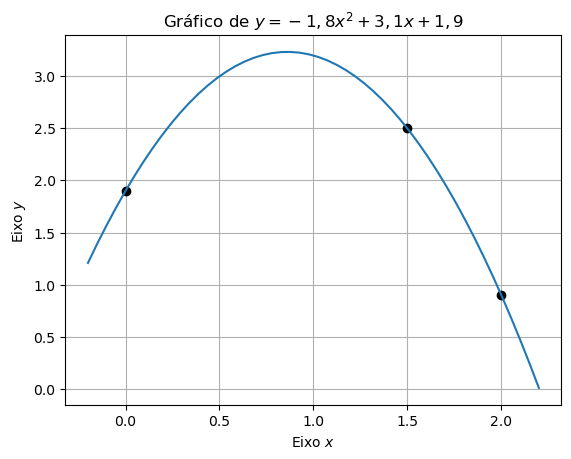

In [90]:
import matplotlib.pyplot as plt
import numpy as np

x = [0.0, 1.5, 2.0]
y = [1.9, 2.5, 0.9]

def P(x): 
    return -1.8*x**2+3.1*x+1.9

xi= np.linspace(-0.2, 2.2)
plt.plot(x, y, 'ko', xi, P(xi),'C0-')

plt.title('Gráfico de $y=-1,8x^2+3,1x+1,9$')
plt.ylabel('Eixo $y$')
plt.xlabel('Eixo $x$')
plt.grid()
plt.savefig('figura_3.3a.png', dpi=300)

No código abaixo é mostrada uma função que calcula o valor numérico do polinômio interpolador usando a fórmula de Lagrange para um dado valor de x. Usando essa função vamos calcular o valor de $P(9)$ e, também, fazer um laço de repetição para calcular o calor do polinômio em um conjunto de pontos para construir o gráfico. Observe que, como é esperado, o gráfico é igual ao do polinômio que foi obtido analiticamente no exemplo 3.3.

In [133]:
def calculaP(x,X,Y):
    valor = 0
    for k in range(len(X)):
        lk = 1.0
        for i in range(len(X)):
            if k != i:
                lk = lk*(x - X[i])/(X[k]-X[i])
        valor = valor + Y[k]*lk 
    return valor

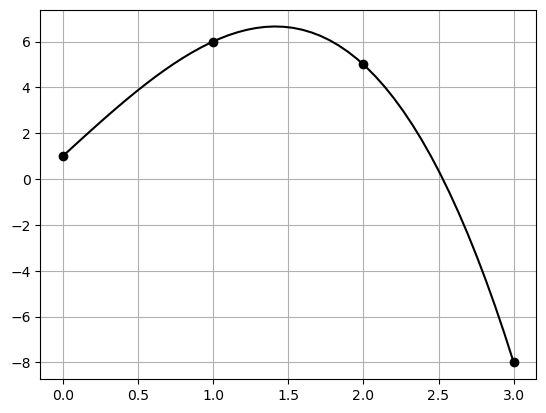

P( 0.9 ) = 5.671


<Figure size 640x480 with 0 Axes>

In [99]:
xi = np.array([0.,1.,2.,3.])
yi = np.array([1.,6.,5.,-8.])

xp = np.linspace(xi[0], xi[-1])
yp = []

for x in xp:
    y = calculaP(x, xi, yi)
    yp.append(y)

plt.plot(xi, yi, 'o', xp, yp,'-',color='black')
plt.grid()
plt.show()

print ("P(",0.9,") =", calculaP(0.9, xi,yi))

plt.savefig('figura_3.3a.png', dpi=300)

**Exemplo 3.4:** Considere a função $f(x)= \frac{0,2x^2sen(x)}{ln\left[(1+x)^2 \right]}$ definida em seis pontos igualmente espaçados tais que $x_0=0.5$ e $x_5=5.5$. Vamos usar a função do exemplo 3.3 para plotar o gráfico do polinômio interpolador de Lagrage juntamente com o gráfico da função e os plontos utilizados.


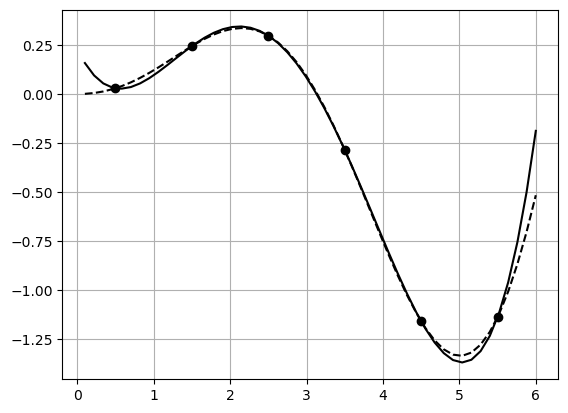

In [88]:
f = lambda x:(0.2*x**2*np.sin(x))/np.log((1 + x)**2)
xi = np.linspace(0.5,5.5,6)
yi = f(xi)

xp = np.linspace(0.1, 6)
yp = []
for x in xp:
    y = calculaP(x, xi, yi)
    yp.append(y)

plt.plot(xi, yi, 'o', 
         xp, yp,'-',
         xp,f(xp),'--',color='black')
plt.grid()
plt.show()

### Fórmula interpolatória de Lagrange para pontos equidistantes

Se os pontos $x_0, ..., x_n$ forem igualmente espaçados, ou seja, se $x_{i+1}-x_i=h$ para $i=0, ..., n-1$, então é possível fazer uma mudança de variável e obter uma fórmula simplificada para o polinômio interpolador de Lagrange.
Fazemos 

$$ u = \frac{x-x_0}{h} $$
que é o mesmo que
$$ x = x_o +uh$$


Com essas mudanças, a fórmula de Lagrange fica 

$$P(u)=\sum_{k=0}^{n} y_k l_k(u) $$

com

$$ l_k(u) = \prod_{j=0 e j\neq k}^{n} \frac{(u-j)}{(k-j)}$$

Para avaliar o valor do polinômio de um determinado valor de $x$ precisamos obter o valor correspondente na variável $u$, fazendo, $ u = \frac{x-x_0}{h} $ e calcular $P(u)$.


**Exemplo 3.4:**

Considere a função $f(x) = \cos(x)$. Obtenha uma aproximação para $f(0.3)$ usando um polinômio de grau 2 com $x_0 = 0.2$ e $h=0.2$.

In [132]:
def calculaP_linspace(u):
    valor = 0
    for k in range(len(X)):
        lk = 1.0
        for i in range(len(X)):
            if k != i:
                lk = lk*(u - i)/(k-i)
        valor = valor + Y[k]*lk 
    return valor

In [130]:
X = np.linspace(0.2, 0.6, 3)
Y = np.cos(X)

h = X[1]-X[0]
u = (0.3 - X[0])/h

print (calculaP(u))

0.9551537603289194


### Exercícios

**1.** Encontre polinômios interpoladores para as funções (a)$ln(x+1)$, (b)$\sqrt{1+x}$ e (c)$e^{2x}cos(3x)$ no intervalo de $x_0=1$ até $x_n=3$ com $3$, $4$ e $5$ pontos escolhidos arbitrariamente no intervalo.

**2.** Dada a tabela a seguir de valores de uma função $f$,

x   | 0,15 | 0,17 | 0,19 | 0,21 | 0,23 | 0,25 | 0,27 | 0,29 | 0,31  | 
----|------|------|------|------|------|------|------|------|-------|
f(x)|0,176 |0,234 |0,278 |0,322 |0,361 |0,398 |0,431 |0,462 |0,491  | 

(a) Obtenha uma estimativa para $f(0,20)$ e para $f(0,22)$ utilizando interpolação polinomial. (b) Obtenha a expressão analítica do polinômio interpolador. Plote o gráfico. (c) Estime $f(0,20)$ e $f(0,22)$ utilizando uma polinomial de terceiro grau. Plote o gráfico e compare com o resultado do item anterior. 

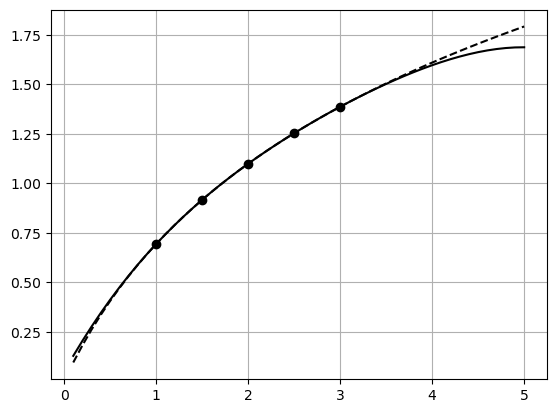

In [109]:
#1a)

f = lambda x: np.log(x+1)
xi = np.linspace(1, 3, 5)
yi = f(xi)

xp = np.linspace(0.1, 5)
yp = []
for x in xp:
    y = calculaP(x, xi, yi)
    yp.append(y)

plt.plot(xi, yi, 'o', 
         xp, yp,'-',
         xp,f(xp),'--',color='black')
plt.grid()
plt.show()

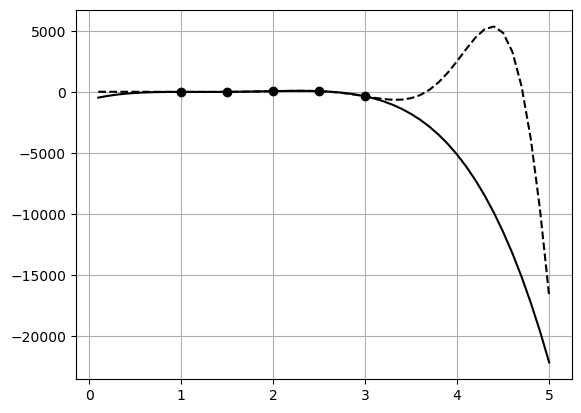

In [113]:
#1b)

f = lambda x: np.exp(2*x)*np.cos(3*x)
xi = np.linspace(1, 3, 5)
yi = f(xi)

xp = np.linspace(0.1, 5)
yp = []
for x in xp:
    y = calculaP(x, xi, yi)
    yp.append(y)

plt.plot(xi, yi, 'o', 
         xp, yp,'-',
         xp,f(xp),'--',color='black')
plt.grid()
plt.show()

In [ ]:
#1c)

f = lambda x: np.sqrt(1+x)
xi = np.linspace(1, 3, 5)
yi = f(xi)

xp = np.linspace(0.1, 5)
yp = []
for x in xp:
    y = calculaP(x, xi, yi)
    yp.append(y)

plt.plot(xi, yi, 'o', 
         xp, yp,'-',
         xp,f(xp),'--',color='black')
plt.grid()
plt.show()

Coeficientes: [-9.59123884e+07  1.78416419e+08 -1.44170464e+08  6.60864800e+07
 -1.87927842e+07  3.39423033e+06 -3.80187817e+05  2.41451159e+04
 -6.65556146e+02]
P(xi): [0.176 0.234 0.278 0.322 0.361 0.398 0.431 0.462 0.491]

f(0.2): 0.300666229249714

f(0.22): 0.3419108581549608


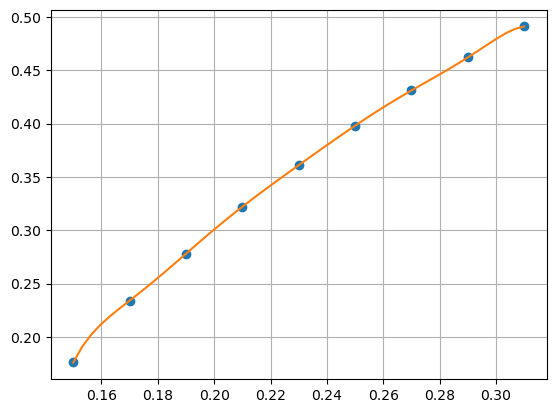

In [82]:
#2)

xi = np.array([0.15, 0.17, 0.19, 0.21, 0.23, 0.25, 0.27, 0.29, 0.31])
yi = np.array([0.176, 0.234, 0.278, 0.322, 0.361, 0.398, 0.431, 0.462, 0.491])

A = np.polynomial.polynomial.polyvander(xi, len(xi)-1)

ai = np.linalg.solve(A,yi)
coeffs = np.flipud(ai) # reverte a ordem
print ("Coeficientes:", coeffs)
print ("P(xi):", np.polyval(coeffs,xi))

print ("\nf(0.2):", np.polyval(coeffs,0.2))
print ("\nf(0.22):", np.polyval(coeffs,0.22))



x = np.linspace(0.15, 0.31)

plt.plot(xi, yi, 'o', x, np.polyval(coeffs, x))
plt.grid()


**3.** Considere a função 
$$f(x)=\frac{3.21}{0.73 + 9.81x^2}$$

(a) Aproxime o valor de $f(1.78)$ usando um polinômio interpolador de grau 3 no intervalo [1, 2] e compare com o valor da função. Mostre o gráfico do polinômio e da função nesse intervalo. (b) Repita o item anterior, mas dessa vez utilize um polinômio de grau 10 no intervalo [-2,2] e comente o que você observou. (c)Pesquise e responda o que é "Fenômeno de Runge".

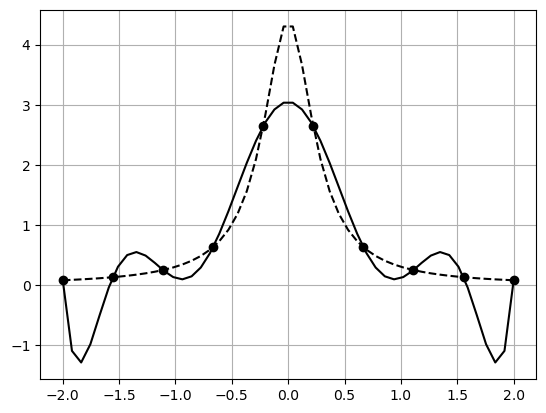

In [128]:
#3)

f = lambda x: 3.21 / (0.73 + 9.81*x**2)

x0 = -2
x1 = 2
xi = np.linspace(x0, x1, 10)
yi = f(xi)

xp = np.linspace(x0, x1)
yp = []
for x in xp:
    y = calculaP(x, xi, yi)
    yp.append(y)

plt.plot(xi, yi, 'o', 
         xp, yp,'-',
         xp,f(xp),'--',color='black')
plt.grid()
plt.show()

**4.** O concreto novo ganha resistência com o passar dos dias atingindo 99% de sua resistência máxima aos 28 dias. A tabela abaixo mostra os resultados de um ensaio de resistência à compressão simples (em MPa), obtidos em laboratório especializado, de três diferentes traços de concreto:
1. Dosagem padrão, sem a adição de agregado miúdo reciclado
2. Substituindo 20% de agregado miúdo natural por agregado miúdo reciclado
3. Substituindo 40% de agregado miúdo natural por agregado miúdo reciclado.

Dias |Traço 1 |Traço 2 |Traço 3 
-----|--------|--------|-------
3    |14,4025 |21,8450 |19,0045 
7    |27,4350 |31,2800 |26,7450 
14   |34,4900 |35,1600 |31,3000 
21   |34,3750 |38,1000 |34,1800 
28   |36,1650 |39,9800 |35,6550 


(a) Encontre o polinômio que interpola dos dados de cada um dos ensaios, faça o gráfico. (b) Estime quantos dias são necessários para que cada um dos concretos alcance 32 MPa. (c) Encontre a resistência de cada concreto após 16 dias. 

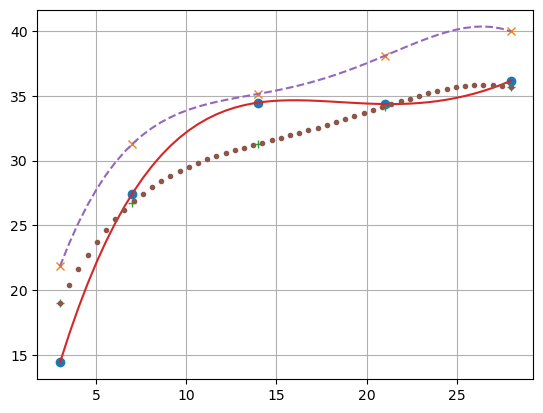

In [145]:
#4)

xi = np.array([3, 7, 14, 21, 28])
yi_t1 = np.array([14.4025, 27.4350, 34.4900, 34.3750, 36.1650])
yi_t2 = np.array([21.8450, 31.2800, 35.1600, 38.1000, 39.9800])
yi_t3 = np.array([19.0045, 26.7450, 31.3000, 34.1800, 35.6550])

x0 = 3
x1 = 28

xp = np.linspace(x0, x1)
yp_t1 = []
yp_t2 = []
yp_t3 = []
for x in xp:
    y_t1 = calculaP(x, xi, yi_t1)
    yp_t1.append(y_t1)
    
    y_t2 = calculaP(x, xi, yi_t2)
    yp_t2.append(y_t2)

    y_t3 = calculaP(x, xi, yi_t3)
    yp_t3.append(y_t3)

#a)
plt.plot(xi, yi_t1, 'o', 
         xi, yi_t2, 'x', 
         xi, yi_t3, '+', 
         xp, yp_t1,'-',
         xp, yp_t2, '--',
         xp, yp_t3, '.')
plt.grid()
plt.show()

#b)

**5.** Durante três dias consecutivos foi tomada a temperatura (em $^\circ$C) numa região de uma
cidade, por quatro vezes no período das 6 às 12 horas. Determine, usando todos os dados
da tabela abaixo, a média das temperaturas dos três dias às 9 horas.

Hora |1º dia |2º dia |3ºdia| 
-----|-------|-------|-----|
6    |18.5   |17.2   |18.1 |
8    |20.3   |20.1   |21.4 |
10   |24.0   |25,1   |22.9 |
12   |28.2   |27.5   |23.7 |

